# Titanic Dataset  Predict survival of passenger 

# Kaggle competition

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

#### Load Dataset & Read

In [2]:
train_df=pd.read_csv('C:\\titanic_train.csv')
test_df=pd.read_csv('C:\\titanic_test.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_df.shape



(891, 12)

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Seaborn pairplot

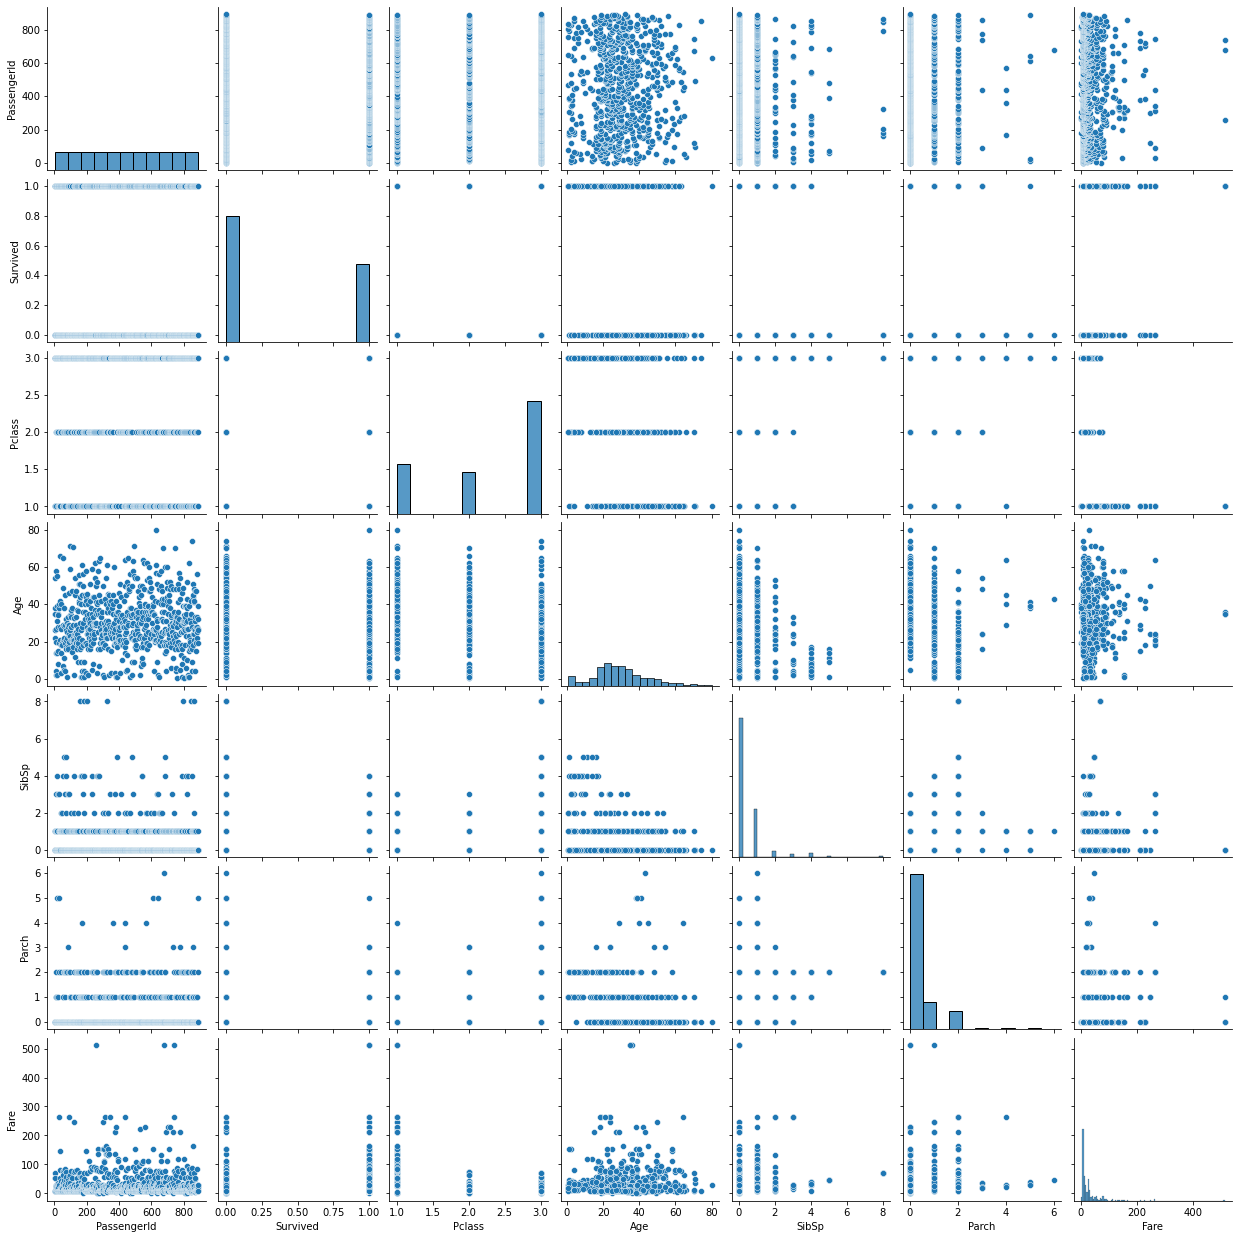

In [6]:
sns.pairplot(train_df)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

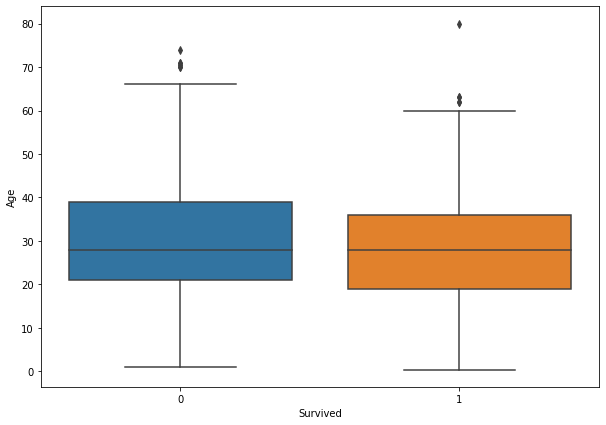

In [7]:
plt.figure(figsize=(10,7))
sns.boxplot(x= "Survived",y="Age",data=train_df)

In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_df.isnull().sum().sum()

866

<AxesSubplot:>

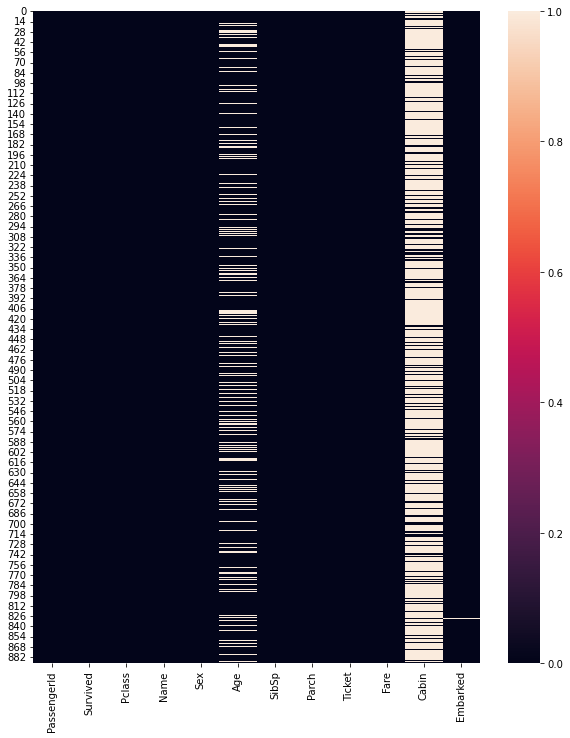

In [10]:
plt.figure(figsize=(10,12)) 
sns.heatmap(train_df.isnull() )

### Handling null value

In [11]:
df1= train_df.fillna(train_df.mean())

C:\Users\amard\AppData\Local\Temp/ipykernel_11436/582801516.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1= train_df.fillna(train_df.mean())


In [12]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
null_percent = df1.isnull().sum()/df1.shape[0]*100
null_percent

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [14]:
col_for_drop = null_percent[null_percent > 20].keys()
col_for_drop

Index(['Cabin'], dtype='object')

In [15]:
train_data= df1.drop(col_for_drop, "columns")
train_data.shape

C:\Users\amard\AppData\Local\Temp/ipykernel_11436/830735151.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_data= df1.drop(col_for_drop, "columns")


(891, 11)

In [16]:
train_data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### Here there is  no  need of Name, cabin ,fare ,embarked, so we are going to skip these columns

In [17]:
df3=train_data[['PassengerId','Survived', 'Pclass','Age', 'Parch','Sex',
          'SibSp','Parch','Fare','Embarked']]
df3

,PassengerId,Survived,Pclass,Age,Parch,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,22.000000,0,male,1,0,7.2500,S
1,2,1,1,38.000000,0,female,1,0,71.2833,C
2,3,1,3,26.000000,0,female,0,0,7.9250,S
3,4,1,1,35.000000,0,female,1,0,53.1000,S
4,5,0,3,35.000000,0,male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,male,0,0,13.0000,S
887,888,1,1,19.000000,0,female,0,0,30.0000,S
888,889,0,3,29.699118,2,female,1,2,23.4500,S
889,890,1,1,26.000000,0,male,0,0,30.0000,C


In [18]:
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
Parch          0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [19]:
#change categorical into dummy variable 
dummy_df=pd.get_dummies(df3 ,drop_first=True )
dummy_df

,PassengerId,Survived,Pclass,Age,Parch,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.000000,0,1,0,7.2500,1,0,1
1,2,1,1,38.000000,0,1,0,71.2833,0,0,0
2,3,1,3,26.000000,0,0,0,7.9250,0,0,1
3,4,1,1,35.000000,0,1,0,53.1000,0,0,1
4,5,0,3,35.000000,0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,0,13.0000,1,0,1
887,888,1,1,19.000000,0,0,0,30.0000,0,0,1
888,889,0,3,29.699118,2,1,2,23.4500,0,0,1
889,890,1,1,26.000000,0,0,0,30.0000,1,0,0


In [20]:
dummy_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
Parch          0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

<AxesSubplot:>

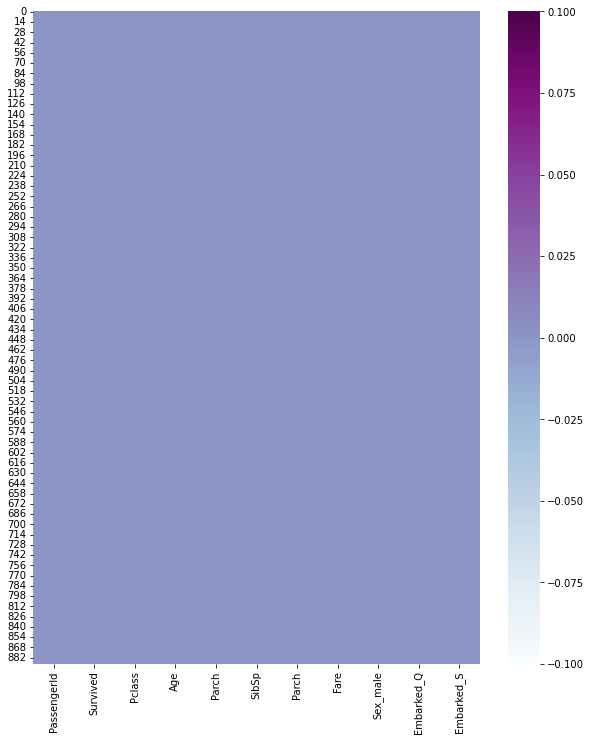

In [21]:
plt.figure(figsize=(10,12)) # here dataset is purely cleaned
sns.heatmap(dummy_df.isnull() , cmap = 'BuPu' )

#### Now data  has no null value this is purely cleaned

## correlation heatmap

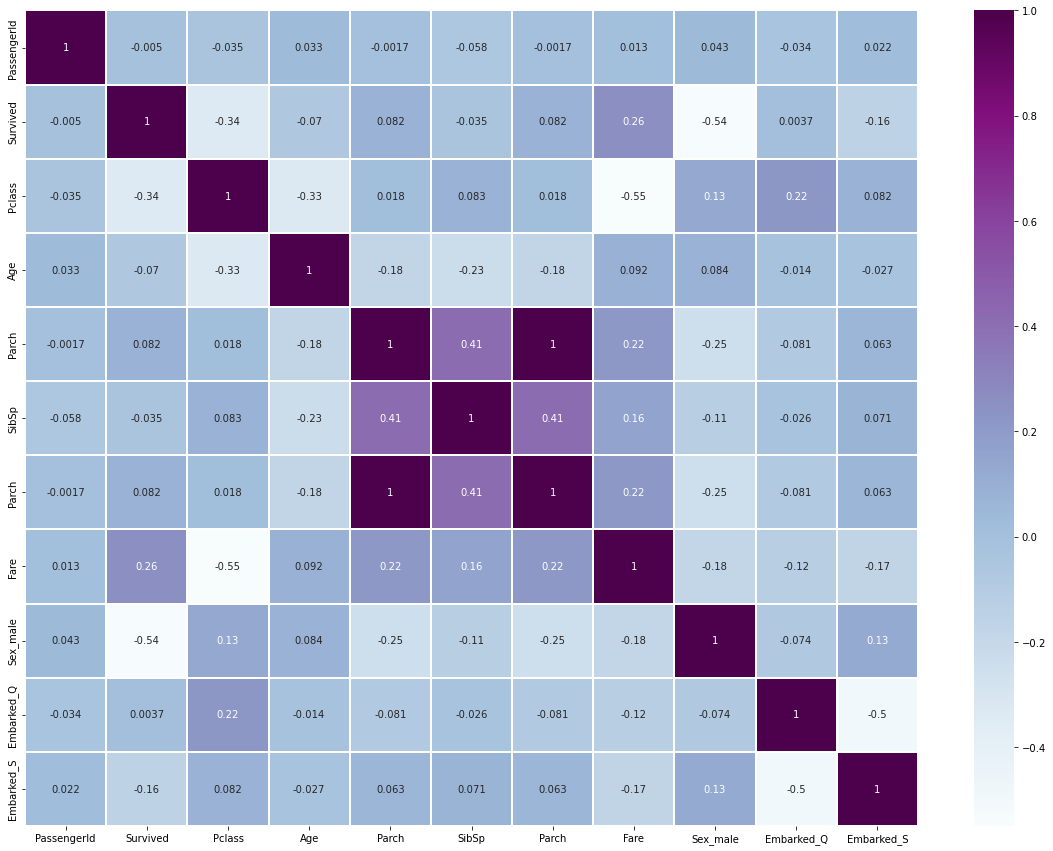

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(dummy_df.corr(),annot=True, cmap= 'BuPu',linewidths=0.1)
plt.show()

# Feature Scaling

In [23]:
import pandas as pd 
import seaborn  as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [24]:
x= dummy_df.drop("Survived",axis=1)
y=dummy_df["Survived"]
print('shape of x =',x.shape)
print('shape of y =',y.shape)

shape of x = (891, 10)
shape of y = (891,)


In [25]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size =0.4,random_state=45)
print('shape of x_train =',x_train.shape)
print('shape of y_train =',y_train.shape)
print('shape of x_test = ',x_test.shape)
print('shape of y_test =',y_test.shape)

shape of x_train = (534, 10)
shape of y_train = (534,)
shape of x_test =  (357, 10)
shape of y_test = (357,)


In [26]:
sc =StandardScaler()     #use  standard scaler method
sc.fit(x_train)

StandardScaler()

In [27]:
sc.mean_

array([4.43413858e+02, 2.26779026e+00, 2.99985090e+01, 3.97003745e-01,
       5.24344569e-01, 3.97003745e-01, 3.35744828e+01, 6.46067416e-01,
       7.86516854e-02, 7.35955056e-01])

In [28]:
sc.scale_

array([254.81018689,   0.84877748,  12.89537139,   0.82995781,
         1.11441317,   0.82995781,  52.44270303,   0.47818857,
         0.26919435,   0.44082333])

In [29]:
x_train.describe()

,PassengerId,Pclass,Age,Parch,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,443.413858,2.267790,29.998509,0.397004,0.524345,0.397004,33.574483,0.646067,0.078652,0.735955
std,255.049109,0.849573,12.907463,0.830736,1.115458,0.830736,52.491876,0.478637,0.269447,0.441237
min,2.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,225.500000,1.000000,22.250000,0.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000
50%,442.500000,3.000000,29.699118,0.000000,0.000000,0.000000,15.047900,1.000000,0.000000,1.000000
75%,655.250000,3.000000,36.000000,0.000000,1.000000,0.000000,30.695800,1.000000,0.000000,1.000000
max,891.000000,3.000000,71.000000,5.000000,8.000000,5.000000,512.329200,1.000000,1.000000,1.000000


In [30]:
x_train_sc=sc.transform(x_train)
x_test_sc =sc.transform(x_train)
x_train_sc

array([[-1.1946691 ,  0.86266396, -1.08554524, ...,  0.74015275,
        -0.29217435,  0.59898132],
       [-1.64990993,  0.86266396, -1.16309244, ..., -1.35107247,
         3.42261387, -1.66950114],
       [-0.35090378,  0.86266396, -0.3876204 , ...,  0.74015275,
        -0.29217435,  0.59898132],
       ...,
       [ 0.39867379, -1.49366624,  1.55105971, ...,  0.74015275,
        -0.29217435, -1.66950114],
       [ 0.78719829,  0.86266396, -0.02321696, ...,  0.74015275,
        -0.29217435,  0.59898132],
       [-0.1115099 ,  0.86266396,  1.08577648, ...,  0.74015275,
        -0.29217435,  0.59898132]])

In [31]:
x_test_sc

array([[-1.1946691 ,  0.86266396, -1.08554524, ...,  0.74015275,
        -0.29217435,  0.59898132],
       [-1.64990993,  0.86266396, -1.16309244, ..., -1.35107247,
         3.42261387, -1.66950114],
       [-0.35090378,  0.86266396, -0.3876204 , ...,  0.74015275,
        -0.29217435,  0.59898132],
       ...,
       [ 0.39867379, -1.49366624,  1.55105971, ...,  0.74015275,
        -0.29217435, -1.66950114],
       [ 0.78719829,  0.86266396, -0.02321696, ...,  0.74015275,
        -0.29217435,  0.59898132],
       [-0.1115099 ,  0.86266396,  1.08577648, ...,  0.74015275,
        -0.29217435,  0.59898132]])

In [32]:
x.keys()

Index(['PassengerId', 'Pclass', 'Age', 'Parch', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [33]:
x_train_sc =pd.DataFrame(x_train_sc,columns=['PassengerId','Pclass', 'Age', 'SibSp', 'Parch','Parch', 'Fare','Sex','Embarked_Q','Embarked_S'])
x_test_sc =pd.DataFrame(x_test_sc,columns=['PassengerId','Pclass', 'Age', 'SibSp', 'Parch', 'Parch','Fare','Sex','Embarked_Q','Embarked_S'])
x_train_sc

,PassengerId,Pclass,Age,SibSp,Parch,Parch,Fare,Sex,Embarked_Q,Embarked_S
0,-1.194669,0.862664,-1.085545,-0.478342,-0.470512,-0.478342,-0.464465,0.740153,-0.292174,0.598981
1,-1.649910,0.862664,-1.163092,-0.478342,-0.470512,-0.478342,-0.487108,-1.351072,3.422614,-1.669501
2,-0.350904,0.862664,-0.387620,-0.478342,0.426821,-0.478342,-0.300795,0.740153,-0.292174,0.598981
3,0.904933,-0.315501,0.077663,-0.478342,-0.470512,-0.478342,-0.392323,0.740153,-0.292174,0.598981
4,-0.664863,-1.493666,0.542946,0.726538,-0.470512,0.726538,-0.073880,0.740153,-0.292174,-1.669501
...,...,...,...,...,...,...,...,...,...,...
529,1.109006,0.862664,-0.775356,-0.478342,-0.470512,-0.478342,-0.475032,0.740153,-0.292174,0.598981
530,0.645917,-1.493666,-0.232526,-0.478342,-0.470512,-0.478342,-0.058626,0.740153,-0.292174,0.598981
531,0.398674,-1.493666,1.551060,-0.478342,0.426821,-0.478342,1.389145,0.740153,-0.292174,-1.669501
532,0.787198,0.862664,-0.023217,-0.478342,-0.470512,-0.478342,0.437074,0.740153,-0.292174,0.598981


In [34]:
x_test_sc 

,PassengerId,Pclass,Age,SibSp,Parch,Parch,Fare,Sex,Embarked_Q,Embarked_S
0,-1.194669,0.862664,-1.085545,-0.478342,-0.470512,-0.478342,-0.464465,0.740153,-0.292174,0.598981
1,-1.649910,0.862664,-1.163092,-0.478342,-0.470512,-0.478342,-0.487108,-1.351072,3.422614,-1.669501
2,-0.350904,0.862664,-0.387620,-0.478342,0.426821,-0.478342,-0.300795,0.740153,-0.292174,0.598981
3,0.904933,-0.315501,0.077663,-0.478342,-0.470512,-0.478342,-0.392323,0.740153,-0.292174,0.598981
4,-0.664863,-1.493666,0.542946,0.726538,-0.470512,0.726538,-0.073880,0.740153,-0.292174,-1.669501
...,...,...,...,...,...,...,...,...,...,...
529,1.109006,0.862664,-0.775356,-0.478342,-0.470512,-0.478342,-0.475032,0.740153,-0.292174,0.598981
530,0.645917,-1.493666,-0.232526,-0.478342,-0.470512,-0.478342,-0.058626,0.740153,-0.292174,0.598981
531,0.398674,-1.493666,1.551060,-0.478342,0.426821,-0.478342,1.389145,0.740153,-0.292174,-1.669501
532,0.787198,0.862664,-0.023217,-0.478342,-0.470512,-0.478342,0.437074,0.740153,-0.292174,0.598981


In [35]:
mmc =MinMaxScaler()   #use Min max scaler
mmc.fit(x_train)

MinMaxScaler()

In [36]:
x_train_mmc =mmc.transform(x_train)
x_test_mmc =mmc.transform(x_test)

In [37]:
x_train_mmc

array([[0.15410574, 1.        , 0.22074242, ..., 1.        , 0.        ,
        1.        ],
       [0.02362205, 1.        , 0.2065741 , ..., 0.        , 1.        ,
        0.        ],
       [0.39595051, 1.        , 0.3482573 , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.61079865, 0.        , 0.70246529, ..., 1.        , 0.        ,
        0.        ],
       [0.72215973, 1.        , 0.4148359 , ..., 1.        , 0.        ,
        1.        ],
       [0.46456693, 1.        , 0.61745537, ..., 1.        , 0.        ,
        1.        ]])

In [38]:
x_train_mmc =pd.DataFrame(x_train_mmc,columns=['PassengerId','Pclass', 'Age', 'SibSp', 'Parch','Parch','Fare','Sex','Embarked_Q','Embarked_S'])
x_test_mmc =pd.DataFrame(x_test_mmc,columns=['PassengerId','Pclass', 'Age', 'SibSp', 'Parch','Parch','Fare','Sex','Embarked_Q','Embarked_S'])
x_train_mmc.describe().round(2)

,PassengerId,Pclass,Age,SibSp,Parch,Parch,Fare,Sex,Embarked_Q,Embarked_S
count,534.00,534.00,534.00,534.00,534.00,534.00,534.00,534.00,534.00,534.00
mean,0.50,0.63,0.42,0.08,0.07,0.08,0.07,0.65,0.08,0.74
std,0.29,0.42,0.18,0.17,0.14,0.17,0.10,0.48,0.27,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.00,0.31,0.00,0.00,0.00,0.02,0.00,0.00,0.00
50%,0.50,1.00,0.41,0.00,0.00,0.00,0.03,1.00,0.00,1.00
75%,0.73,1.00,0.50,0.00,0.12,0.00,0.06,1.00,0.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Now trained the model using different supervised machine learning alogorithm 

###  Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion ='gini')
classifier.fit(x_train , y_train)
classifier.score(x_test , y_test)

0.7647058823529411

In [40]:
# Model build after applying Feature Scaling (entropy)
classifier_entropy = DecisionTreeClassifier(criterion = 'entropy')
classifier_entropy.fit(x_train ,y_train)
classifier_entropy.score(x_test ,y_test)

0.7535014005602241

In [41]:
# Model build after applying feature Scaling (standard Scaler)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

In [42]:
classifier_sc= DecisionTreeClassifier(criterion = 'gini')
classifier_sc.fit(x_train_sc, y_train)
classifier_sc.score(x_test_sc , y_test)

0.773109243697479

## Random Forest classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier 

In [44]:
classifier_RFC= RandomForestClassifier(n_estimators=100, criterion = 'entropy')
classifier_RFC.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy')

In [45]:
classifier_RFC.score(x_test,y_test)  # here we got 83% accuracy that is 

0.8319327731092437

In [46]:
y_pred=classifier_RFC.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

## Here I got 83% accuracy that is good score  

## Support Vector classifier

In [47]:
# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)
svc_classifier.predict(x_test)
svc_classifier.score(x_test, y_test)


0.6722689075630253

### K - Nearest Neighbor Classifier

In [48]:
#K – Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train, y_train)
knn_classifier.predict(x_test)
knn_classifier.score(x_test, y_test)

0.6358543417366946

### Naive Bayes Classifier

In [49]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
nb_classifier.predict(x_test)
nb_classifier.score(x_test, y_test)


0.8095238095238095

##  Now  we are going to  predict survival on given test dataset

In [50]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [51]:
test_df.shape

(418, 11)

In [52]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [53]:
df2= test_df.fillna(train_df.mean())

C:\Users\amard\AppData\Local\Temp/ipykernel_11436/8221282.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2= test_df.fillna(train_df.mean())


In [54]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [55]:
null_percent = df2.isnull().sum()/df2.shape[0]*100
null_percent

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [56]:
col_for_drop = null_percent[null_percent > 20].keys()
col_for_drop

Index(['Cabin'], dtype='object')

In [57]:
test_data= df2.drop(col_for_drop, "columns")
test_data.shape

C:\Users\amard\AppData\Local\Temp/ipykernel_11436/2472382675.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_data= df2.drop(col_for_drop, "columns")


(418, 10)

In [58]:
test_data.keys()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [59]:
df4=test_data[['PassengerId', 'Pclass','Age', 'Parch','Sex',
          'SibSp','Parch','Fare','Embarked']]

#change categorical into dummy variable 
x_test_dataset=pd.get_dummies(df4 ,drop_first=True )
x_test_dataset

,PassengerId,Pclass,Age,Parch,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.500000,0,0,0,7.8292,1,1,0
1,893,3,47.000000,0,1,0,7.0000,0,0,1
2,894,2,62.000000,0,0,0,9.6875,1,1,0
3,895,3,27.000000,0,0,0,8.6625,1,0,1
4,896,3,22.000000,1,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,29.699118,0,0,0,8.0500,1,0,1
414,1306,1,39.000000,0,0,0,108.9000,0,0,0
415,1307,3,38.500000,0,0,0,7.2500,1,0,1
416,1308,3,29.699118,0,0,0,8.0500,1,0,1


In [60]:
x_test_dataset.isnull().sum()


PassengerId    0
Pclass         0
Age            0
Parch          0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [61]:
y_pred1=classifier_RFC.predict(x_test_dataset)
y_pred1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:
y_pred1.shape

(418,)

### Save Model

In [63]:
pd.DataFrame(y_pred1)

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [64]:
test_df_PassengerId  =test_df['PassengerId'].astype(int)
test_df_PassengerId


0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int32

In [65]:
Final_summit_file =pd.concat([test_df_PassengerId , pd.DataFrame(y_pred1)],axis=1, )
Final_summit_file.columns =['PassengerId','Survived',]
Final_summit_file

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [66]:
Final_summit_file.to_csv('titanic_submission_file.csv', index = False)

### In above  I have predict survival on the titanic dataset.  I got 83% accuracy by using supervised Random Forest classifier Machine learning Algorithm 